In [1]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code
1.   Implement and apply PCA and LDA to MNIST to find 2 dimensional spaces.
2.   Visualize them by plotting the samples for both algorithms.

Loading data...
... data has been loaded!


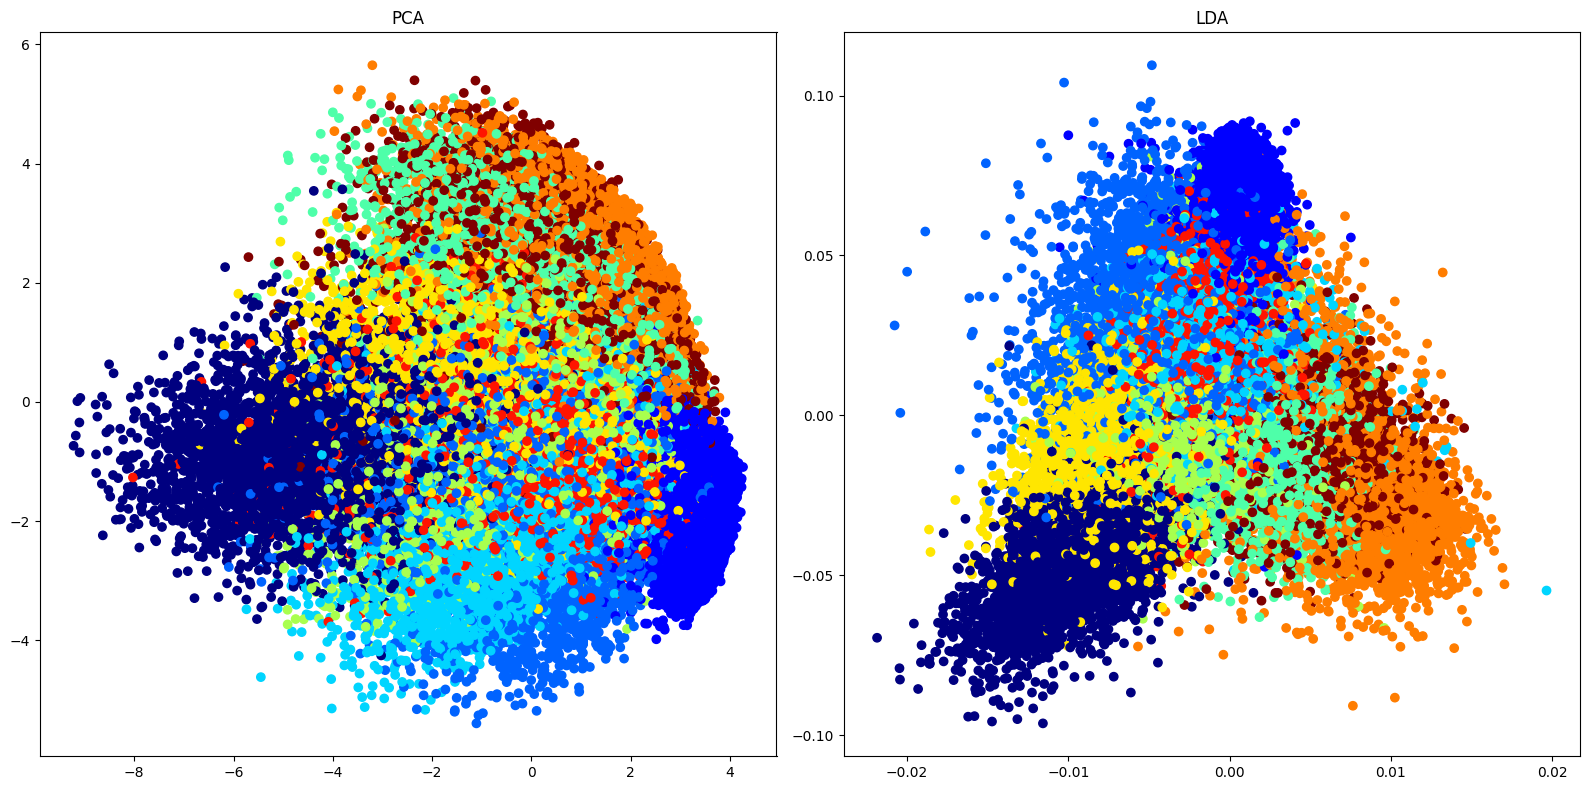

In [9]:
#Code here

import os
import urllib.request
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

# from Homework1
def load_data(dataset):
  if not os.path.isfile(dataset):
    origin = (
      'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)
  print('Loading data...')

  with gzip.open(dataset, 'rb') as f:
    try:
      train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    except:
      train_set, valid_set, test_set = pickle.load(f)
  print('... data has been loaded!')

  return train_set, valid_set, test_set

def pca(data, n_components=2):
  centered_data = data - data.mean(axis=0)
  cov = np.cov(centered_data, rowvar=False)

  eigenvalues, eigenvectors = np.linalg.eigh(cov)
  idxs = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idxs]
  eigenvectors = eigenvectors[:, idxs]
  top_eigenvectors = eigenvectors[:, :n_components]
  pca_result =  np.dot(centered_data, top_eigenvectors)
  return pca_result

# reference from https://www.python-engineer.com/courses/mlfromscratch/14-lda/
# reference from https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/discriminant_analysis.py
def lda(data, labels, n_components=2):
    class_labels = np.unique(labels)
    class_means = np.array([data[labels == label].mean(axis=0) for label in class_labels])
    overall_mean = data.mean(axis=0)
    n_features = data.shape[1]

    within_class_scatter = np.zeros((n_features, n_features))
    for label, mean in zip(class_labels, class_means):
        class_data = data[labels == label]
        diff = class_data - mean
        within_class_scatter += np.dot(diff.T, diff)
    between_class_scatter = np.zeros((n_features, n_features))
    for label, mean in zip(class_labels, class_means):
        n = len(data[labels == label])
        diff = mean - overall_mean
        between_class_scatter += n * np.outer(diff, diff)

    within_class_scatter += np.eye(within_class_scatter.shape[0]) * 1e-6
    eigenvalues, eigenvectors = np.linalg.eig(
        np.linalg.inv(within_class_scatter).dot(between_class_scatter)
    )

    idxs = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idxs]
    top_eigenvectors = eigenvectors[:, :n_components]
    lda_result = np.dot(data, top_eigenvectors)
    return lda_result

# 1) Load the MNIST dataset as in Homework5
dataset_file = 'mnist.pkl.gz'
train_set, _, _ = load_data(dataset_file)
x, y = train_set # data, label
y_integer = list(map(int, y))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
pca_result= pca(x)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_integer, cmap=plt.get_cmap('jet', 10))
plt.title("PCA")

# LDA plot
plt.subplot(1, 2, 2)
lda_result = lda(x, y)
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y_integer, cmap=plt.get_cmap('jet', 10))
plt.title("LDA")

plt.tight_layout()
plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you implement from scratch (without any specialized libraries) and apply PCA and LDA to the MNIST dataset to find 2 dimensional spaces?
2.   (If not provided automatically in the previous prompt:) Can you plot both PCA and LDA results?


**Paste the answer provided and run the code below:**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


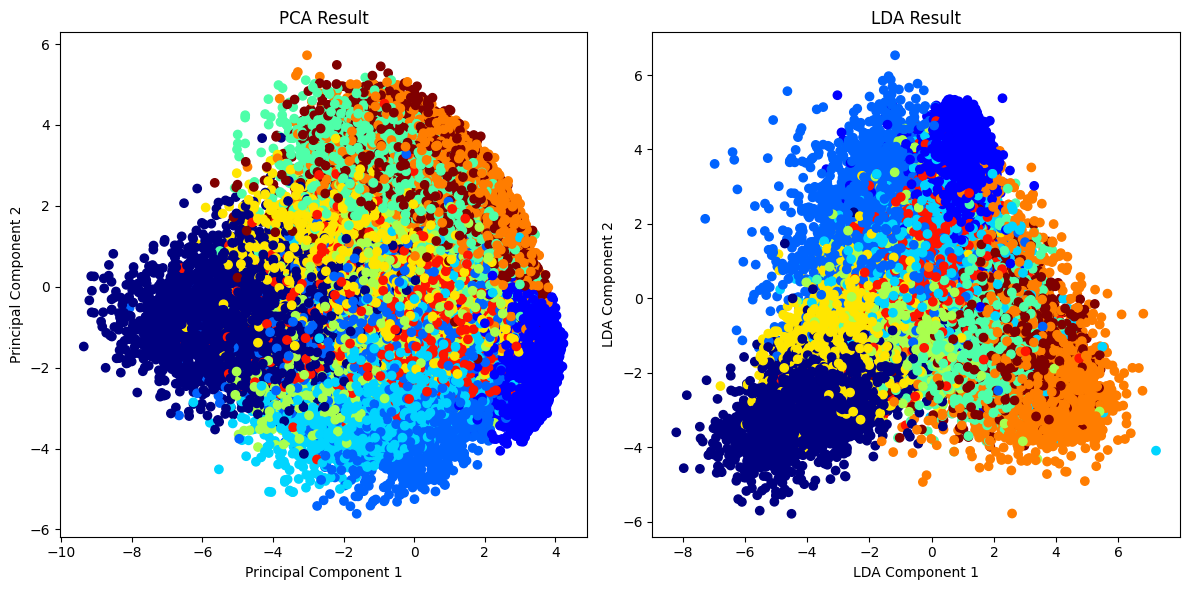

In [11]:
#Paste code here
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target
X = X.astype(float)
X /= 255.0  # Normalize pixel values

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute the mean of the data
mean = np.mean(X_train, axis=0)

# PCA
# Center the data by subtracting the mean
X_centered = X_train - mean
# Calculate the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# Sort eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
# Choose the top 2 eigenvectors
top_eigenvectors = eigenvectors[:, :2]
# Project the data onto the 2D space
pca_result = np.dot(X_centered, top_eigenvectors)

# LDA
# Implement LDA here and get a similar 2D result

# Map class labels to numerical values for plotting
class_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
y_train_numeric = np.array([class_mapping[label] for label in y_train])

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train_numeric, cmap=plt.get_cmap('jet', 10))
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Perform LDA and plot the result in the same manner as PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.subplot(1, 2, 2)
# Implement LDA here and plot the results in a similar manner as PCA. -
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(X_train, y_train_numeric) # This part is added and changed by repeated prompting
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y_train_numeric, cmap=plt.get_cmap('jet', 10))
plt.title("LDA Result")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")

plt.tight_layout()
plt.show()


##Report


1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)

1) GPT somehow omitted the LDA configuration and plot. If you request additional information, it will be filled in, but an error will immediately occur. It also provides the sklearn library. I don't think
GPT will feel the burden of calculating LDA, but I'm not sure why this phenomenon occurs. So I just changed some codes form GPT to show the right figures.

2) I used two functions which named lda() and pca() to make it easy to understand what each plot graph is about by reading the code. The internal PCA and LDA structures were confirmed through functions. However, GPT continues the code flow without any significant changes.

3) I did not include cmap=plt.get_cmap('jet',10) again when plotting. So, green viridis was entered as the default, and the 10 elements were not clearly distinguished. I added GPT's answer to my code and modified it to make it easier to see at a glance.
The previous state is as follows:
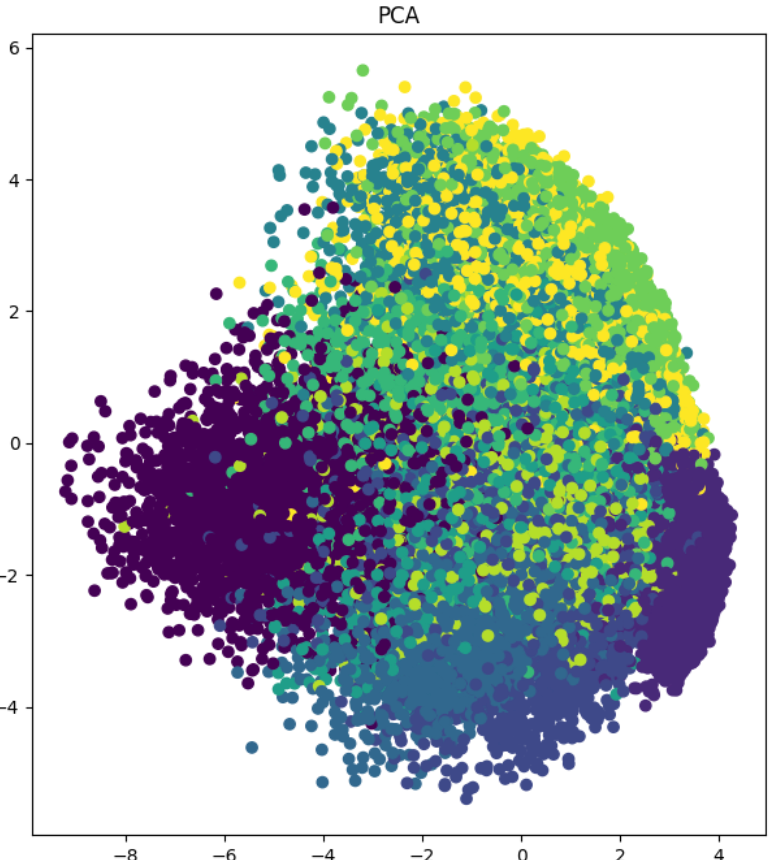

2.   Ask ChatGPT to compare the differences between PCA and LDA. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

> GPT Response:
Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are both dimensionality reduction techniques used in the field of machine learning and statistics, but they have different objectives and work differently. Here are the key differences between PCA and LDA:
1. **Objective**:
   - PCA: PCA is an unsupervised technique that aims to find the orthogonal axes (principal components) along which the data has the maximum variance. Its primary goal is to reduce the dimensionality of the data while preserving as much variance as possible.
   - LDA: LDA is a supervised technique that aims to find the axes that maximize the separation between different classes. It focuses on maximizing the between-class variance while minimizing the within-class variance.
2. **Supervision**:
   - PCA: Unsupervised. It does not take class labels into account when finding principal components.
   - LDA: Supervised. It requires class labels to find the discriminative axes.
3. **Use Case**:
   - PCA: Typically used for data preprocessing, noise reduction, and visualization. It's not designed for classification but can indirectly improve classification performance by reducing dimensionality.
   - LDA: Specifically designed for classification tasks. It's used to reduce dimensionality while enhancing the separability of different classes in a supervised learning context.
4. **Number of Components**:
   - PCA: The number of principal components is equal to the original number of features. You can choose to retain a subset of the top components based on the explained variance.
   - LDA: The number of linear discriminants is at most one less than the number of classes. In practice, you often choose fewer discriminants.
5. **Orthogonality**:
   - PCA: Principal components are orthogonal to each other, which means they are linearly independent and uncorrelated.
   - LDA: Linear discriminants are not necessarily orthogonal, which allows them to capture the class-related variance.
6. **Data Transformation**:
   - PCA: Transforms data into a new coordinate system aligned with the principal components.
   - LDA: Transforms data into a new coordinate system that maximizes class separability.
7. **Explained Variance**:
   - PCA: It quantifies how much of the total variance in the data is explained by each principal component.
   - LDA: It maximizes the separation between classes; therefore, it doesn't explicitly focus on explaining variance.
8. **Use with Class Imbalance**:
   - PCA: It's not explicitly designed to handle class imbalance.
   - LDA: LDA can be influenced by class imbalance, and the relative class sizes may impact its effectiveness.
9. **Classification**:
   - PCA: PCA itself does not perform classification. It is often used as a preprocessing step before applying a classifier.
   - LDA: LDA can be used both for dimensionality reduction and as a classifier when you reduce the dimensionality to the number of classes minus one.<br><br>
In summary, PCA and LDA are both dimensionality reduction techniques, but they have distinct purposes and are suitable for different scenarios. PCA is more for data preprocessing, visualization, and feature reduction, while LDA is specifically designed to enhance the separability of classes in a classification context. The choice between PCA and LDA depends on your specific problem and objectives.

Right. LDA and PCA are similarly techniques for reducing dimensionality by projecting an input data set into a low-dimensional space. However, while PCA finds the axis with the greatest variability (variance) of the input data, LDA finds the axis that can maximize the separation of decision value classes in the input data. In other words, LDA maximizes the inter-class variance and keeps the intra-class variance as small as possible to find the axis that maximizes class separation. Meanwhile, PCA obtains and projects eigenvectors based on the covariance matrix.


4.   Conclude with some thoughts and things you learned from this homework.

This homework provided valuable insights into dimensionality reduction techniques and their practical applications. It emphasized the importance of data preprocessing. These skills would be essential for effective data analysis and machine learning.